<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/03_Bagging_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Bootstrap Aggregating[Bagging] & Random Forests</h1> 
</strong>

---


<p align='center'>
    <a href='#'><img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/Ensamble_map_.png?raw=true' width=400></a>
</p>

__Clone the Repository__

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 2434 (delta 69), reused 175 (delta 24), pack-reused 2186
Receiving objects: 100% (2434/2434), 298.15 MiB | 22.03 MiB/s, done.
Resolving deltas: 100% (847/847), done.
Checking out files: 100% (1044/1044), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
#sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/28_Machine-Learning-with-Tree-Based-Models-in-Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/28_Machine-Learning-with-Tree-Based-Models-in-Python/_dataset


In [4]:
ls

auto.csv   indian_liver_patient.csv               wbc.csv
bikes.csv  indian_liver_patient_preprocessed.csv


## **Bagging**

A Bagging classifier is an **ensemble meta-estimator** that **fits** **base classifiers** each on **random subsets** of the original dataset and then **aggregate** their individual **predictions** (*either* by voting or by averaging) to form a **final prediction**. Such a meta-estimator can typically be used as a way ***to reduce the variance*** of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

- Bagging is used with **decision trees**, where it significantly raises the stability of models in the **reduction** of **variance** and **improving accuracy**, which **eliminates** the challenge of **overfitting**. Bagging in ensemble machine learning takes several weak models, aggregating the predictions to select the best prediction.

- Uses a techinque known as **bootstrap** (sample with replacement for multiple times at a fixed size)

- **Reduces variance** of individual models in the ensemble.
-Train each model on a bootstrap subset of the traning set.

- Output a final prediction:
    - **Classification:** aggregates predictions by majority voting. `BaggingClassifier`
    - **Regression:** aggregates predictions through averaging. `BaggingRegressor`

![Bagging](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/bagging.png?raw=true)

$\Rightarrow$ Decision trees are sensitive to the specific data on which they are trained. If the training data is changed (e.g. a tree is trained on a subset of the training data) the resulting decision tree can be quite different and in turn the predictions can be quite different.

$\Rightarrow$ Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.

Let’s assume we have a sample dataset of `1000` instances `(x)` and we are using the `CART algorithm`. Bagging of the CART algorithm would work as follows.

1. Create many (e.g. `100`) random sub-samples of our dataset with replacement.
2. Train a CART model on each sample.
3. Given a new dataset, calculate the average prediction from each model.

__For example__, *if we had 5 bagged decision trees that made the following class predictions for a in input sample: blue, blue, red, blue and red, we would take the most frequent class and predict blue.*

>When bagging with decision trees, we are less concerned about individual trees overfitting the training data. For this reason and for efficiency, the individual decision trees are grown deep (e.g. few training samples at each leaf-node of the tree) and the trees are not pruned. *These trees will have both high variance and low bias*. These are important characteristics of sub-models when combining predictions using bagging.

>The only parameters when bagging decision trees is the number of samples and hence the number of trees to include. This can be chosen by increasing the number of trees on run after run until the accuracy begins to stop showing improvement (e.g. on a cross validation test harness). Very large numbers of models may take a long time to prepare, but will not overfit the training data.

Just like the decision trees themselves, __Bagging can be used for classification and regression problems__.



## **Define the bagging classifier**

In the following exercises you'll work with the [Indian Liver Patient dataset](https://www.kaggle.com/uciml/indian-liver-patient-records) from the UCI machine learning repository. Our task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. we'll do so using a Bagging Classifier.






__Preprocess__

In [5]:
df_liver = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)
df_liver.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_liver.drop('Liver_disease', axis='columns')
y = df_liver['Liver_disease']

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)


# Instantiate bc
bc = BaggingClassifier(base_estimator=dt,
                       n_estimators=50,
                       random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred_dt = dt.predict(X_test)

# Evaluate acc_test
acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of Decision Tree Classifier: {:.2f}'.format(acc_test_dt))

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test_bc = accuracy_score(y_test, y_pred)
print('Test set accuracy of Bagging Classifier: {:.2f}'.format(acc_test_bc))

Test set accuracy of Decision Tree Classifier: 0.63
Test set accuracy of Bagging Classifier: 0.71


## **Out of Bag Evaluation**

When performing a **bootstrapping**, For each **bootstrap sample** taken from the **training data**, there will be samples left behind that were not included. These samples are called **Out-Of-Bag samples** or **OOB**. Therefore, we can use these **unused data points** to ***test the performance of the model***, instead of using $CV$.

- **Out Of Bag (OOB)** instances
    - On average, for each model, 63% of the training instances are sampled
    - The remaining 37% constitute the OOB instances
- **OOB Evaluation**

$$Final-OOB-Score=\frac{OOB_1+…+OOB_N}{N}$$

In sklearn, we can evaluate the `OOB accuracy` of an `ensemble classifier` by setting the parameter `oob_score` to `True` during __instantiation__. After training the classifier, the OOB accuracy can be obtained by accessing the `.oob_score_` attribute from the corresponding instance.


<p align='center'>
  <a href="#">
    <img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/oob.png?raw=true' width=800 alt="">
  </a>
</p>


In [7]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, 
                            random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=50, 
                       oob_score=True, 
                       random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}'.format(acc_test))
print('OOB accuracy: {:.3f}'.format(acc_oob))

Test set accuracy: 0.698
OOB accuracy: 0.700


A single tree `dt` would have achieved an accuracy of 69.8% which is lower than `bc`'s accuracy!

## **Random Forests (RF)**


**Random forest** is a **supervised learning algorithm**. The **forest** it builds, is an **ensemble** of decision trees, usually trained with the **bagging**.

>**Random Forests are an improvement over bagged decision trees.**

A problem with decision trees like **CART** is that they are greedy. They choose which variable to split on using a greedy algorithm that minimizes error. As such, even with Bagging, the decision trees can have a lot of structural similarities and in turn have **high correlation** in their predictions.

>***Combining predictions from multiple models in ensembles works better if the predictions from the sub-models are uncorrelated or at best weakly correlated.***

Random forest __changes__ the algorithm for the way that the __sub-trees__ are learned so that the __resulting predictions__ from all of the subtrees have __less correlation__.

>It is a __simple tweak__. In CART, when selecting a split point, the learning algorithm is allowed to look through all variables and all variable values in order to select the most optimal split-point. The random forest algorithm changes this procedure so that the __learning algorithm is limited to a random sample__ of features of which to search.

The number of features that can be searched at each split point (m) must be specified as a parameter to the algorithm. You can try different values and tune it using cross validation.

- For __classification__ a good default is: ${m = \sqrt(p)}$
- For __regression__ a good default is: ${m = \frac{p}{3}}$

Where $m$ is the number of randomly selected features that can be searched at a split point and p is the number of input variables. For example, if a dataset had $25$ input variables for a classification problem, then:

$\Rightarrow{m = \sqrt(p)}$

$\Rightarrow{m = 5}$





**Why Random Forest algorithm?**

***Advantages:***
- It can be used for both **classification** and **regression** tasks.

- **Second**: **Overfitting** is one critical problem that may make the results worse, but for Random Forest algorithm, *if there are enough trees in the forest, the classifier won’t overfit the model.*

- **Third**: advantage is the classifier of Random Forest **can handle missing values**, and

- the **last** advantage is that the Random Forest classifier ***can be modeled for categorical values***.

- The difference between **Random Forest algorithm** and the **decision tree algorithm** is that in Random Forest, the processes of finding the **root node** and **splitting** the feature nodes will run **randomly**.

***How the Random Forest Classifier works***

- Randomly select $K$ features from total $m$ features where ${k<<m}$
- Among the $K$ features, calculate the node $d$ using the best split point.



- **Bagging**
    - Base estimator: Decision Tree, Logistic Regression, Neural Network, ...
    - Each estimator is trained on a distinct bootstrap sample of the training set
    - Estimators use all features for training and prediction

- **Further Diversity with Random Forest**
    - Base estimator: Decision Tree
    - Each estimator is trained on a different bootstrap sample having the same size as the training set
    - RF introduces further randomization in the training of individual trees
    - __d__ features are sampled at each node without replacement
 
- ***Random Forest: Training***
![rf_train](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/rf_training.png?raw=true)

- ***Random Forest: Prediction***


![rf_pred](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/rf_pred.png?raw=true)
- Feature importance
    - Tree based methods: enable measuring the importance of each feature in prediction
    

### Train an RF regressor
In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

- Preprocess

In [8]:
bike = pd.read_csv('bikes.csv')
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


Test set RMSE of Random forest: 54.49


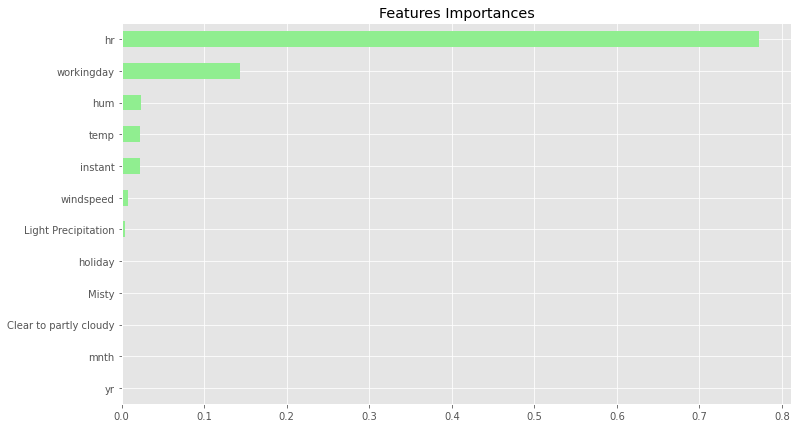

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X = bike.drop('cnt', axis='columns')
y = bike['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=2)

# Fit rf to the training set
rf.fit(X_train, y_train)

# Evaluate the RF regressor-----------------------------------------------------
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**0.5

# Print rmse_test
print('Test set RMSE of Random forest: {:.2f}'.format(rmse_test))

# Visualizing features importances----------------------------------------------
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen', figsize=(12,7))
plt.title('Features Importances')
plt.savefig('/content/feature_importances.png')

Apparently, ```hr``` and ```workingday``` are the most important features according to ```rf```. The importances of these two features add up to more than 90%!

# **Bagging - IRIS DataSet** 

In [10]:
# Import All the required packages from sklearn
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load the data
iris = load_iris()
X = iris.data
Y = iris.target

# Split the data in traning and testing set
X_fit, X_eval, y_fit, y_test= model_selection.train_test_split( X, Y, test_size=0.30, random_state=1 )

# Creat data in training and testing set
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

# Define the decision tree clissifier
cart = DecisionTreeClassifier()
num_trees = 100

# Create classification model for bagging
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

# Train different models and print their accuracy
results = model_selection.cross_val_score(model, X_fit, y_fit,cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+str(results[i]))

print("Mean Accuracy is: "+str(results.mean()))

model.fit(X_fit, y_fit)
pred_label = model.predict(X_eval)
nnz = np.shape(y_test)[0] - np.count_nonzero(pred_label - y_test)
acc = 100*nnz/np.shape(y_test)[0]
print('accuracy is: '+str(acc))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: 0 Accuracy is: 1.0
Model: 1 Accuracy is: 1.0
Model: 2 Accuracy is: 1.0
Model: 3 Accuracy is: 0.9090909090909091
Model: 4 Accuracy is: 1.0
Model: 5 Accuracy is: 1.0
Model: 6 Accuracy is: 0.9
Model: 7 Accuracy is: 1.0
Model: 8 Accuracy is: 1.0
Model: 9 Accuracy is: 0.7
Mean Accuracy is: 0.9509090909090908
accuracy is: 95.55555555555556


<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>